Up to this point, we have been working exclusively with forms of supervised learning. This means we've had a set of datapoitns, and each datapoint is described by a set of *features*, as well as a *label* that we want to predict. Generally speaking, for our model to work, we need to assume that there is some meaningful relationship between the features and the labels, meaningful enough that we should be able to **predict** the label from the features. 

Let's illustrate this with a hypothetical dataset of political views. Let's say we have a person's gender, race, income, and home state as the features, and we have a binary label "liberal" and "conservative." Such data might look like this table I've made up:

| Gender | Race | Income | State | Politics |
| --- | --- | --- | --- | --- |
| M | White | 57000 | AL | Conservative |
| F | White | 42000 | CO | Conservative |
| F | Black | 62000 | AK | Conserative |
| M | White | 39000 | WA | Liberal |
| M | Black | 44000 | IL | Liberal |
| F | Black | 52000 | MA | Liberal |

I use politics as an example because I think we can all agree that the combination of a person's gender, race, income, and home state probably has some predictive power on political persuasion (although this isn't the full picture by far). 

Now let's turn from tables to networks. In some of your readings, you learned about the concept of **homophily**, which states that "birds of a feather flock together"; e.g. people tend to make relationships with people who are similar to them. *If* we assume this idea is true, this has consequences for the way real-world networks of relationships look. Think about your own situation, and your political views (or IU major, or taste in music, or favorite NFL team, or whatever). More likely than not, you'll probably find that most of your friends are similar to you. There are many exceptions, but as is always the case in statistics, we're looking for broad trends.

Taking this idea forward, this means that if we look at the *structure of a network* and attempt to identify *groupings of nodes*, we might find *meaningful* groups that are a consequence of homophily in action. Say that we make a retweet network of Twitter users who use hashtags about the 2016 election. We don't know their political persuasion - and in many cases, we probably don't know their gender, race, or income. We could probably got the state for only a subsection of the users.

Despite this lack of attribute data, what if we simply try to group the users based on the structure of the network? By homophily, we hypothesize that liberal Tweeters are more likely to retweet other liberals, and conservatives will retweet conservatives more often. By finding groupings using only network structure, we might find an alternate route to discovering someone's political persuasion.

# Community

Let's use the term **community** to refer to a natural grouping of nodes in a network. More precisely, let a community refer to a **subsetset of nodes in a network** and we'll represent it with $\mathcal{C}$.

Each node $v$ in the community $\mathcal{C}$ may have some edges emerging from it. *Some* of these edges go to *other nodes in $\mathcal{C}$*. We call these **internal edges**. They're edges within the community.

Some of these edges go to *nodes outside of the community $\mathcal{C}$.* They're edges outside of the community. We call these **external edges**.

# Finding Good Communities

Now that we have a definition of *community*, we could take a given graph and randomly assign each node to a set of $k$ communities. For each of the communities, we could calculate the number of internal edges it has, and the number of external edges it has. However, by assigning nodes to communities randomly, we, of course, wouldn't be getting *good* communities. 

How do we do that? The intuition behind doing this is simple, but the math is not. Intuitively, **a good community is one that has a high amount of internal edges and a low amount of external edges**. Put in simple English, if a group of nodes truly constitute a community, they should be more connected to each other than they are to nodes *outside* the community.

# Modularity 

One of the most common metric for quantifying how good a certain configuration of communities is is known as *modularity*. The equation is as follows:

$$\mathcal{Q} = \frac{1}{2m} \sum_{ij} (A_{ij}-P_{ij})\cdot\delta(C_i, C_j)$$

$m$ represents the number of edges in the graph. Modularity iterates over ever edge (the summation over $ij$), and for each edge, it subtracts $P_{ij}$, which is the probability of an edge under the null model, from $A_{ij}$, which is the adjacency matrix entry for that edge - in an unweighted, undirected graph, this is a 1 of the edge exists and a 0 otherwise. Finally, this difference is included in the summation only of the edge is within a community: $\delta(C_i, C_j)$ equals 1 if $i$ and $j$ are in the same community, and 0 otherwise.

The trickiest part is $P_{ij}$, the probability of a link between $i$ and $j$ under the null model. There are import considerations when it comes to *which* null model should be used, but we aren't able to go into the full details of that here.

The main takeaway is that modularity $\mathcal{Q}$ takes a value between -1 and 1, and the higher the modularity is, the better the set of communities is. Thus, one approach to finding the best communities in a given graph is known as *modularity optimization*, that is, dividing your nodes into various communities until you get the highest modularity possible. 

# Partitions

A vocabulary note: a division of a set of nodes such that each node is in a community is known as a **partition**. Let's imagine a simple network with only 3 nodes, A, B, and C. One potential way to partition the nodes is to simply put all 3 of them into the same community.

| Community 1|
|---|
|A, B, C|

We could also partition these 3 nodes into one community of of 2 nodes and another community with one node. 

|Community 1| Community 2|
|---|---|
|A, B|C|

Is one possible partition, but we also have

|Community 1| Community 2|
|---|---|
|A|B, C|

And finally

|Community 1| Community 2|
|---|---|
|A,C|B|

Lastly, we can simply and trivially assign every node to its own community.

|Community 1|Community 2|Community 3|
|---|---|---|
|A|B|C|

We can see that when there are 3 nodes, there are **5 possible partitions**.

# The Brute-Force Approach to finding the Best Communities

With the evaluative metric of modularity, we can intuit a seemingly-simple, brute-force method for finding the "best" set of communities. Given a network, let's simply go over ever possible partition and calculate its associated modularity. Then, we pick the partition with the highest modularity. Simple enough, right?

There are two problems, however.

First: there is the trivial solution of simply putting *all nodes in a single community*. This would result in maximum modularity. Intuitively, if all nodes are in a single gigantic community, then *every* edge is an internal edge and there are *no* external edges: maximum modularity. In spite of this high modularity, the partition created for us is trivial and non-informative.

Second: the brute-force method simply does not scale. With 3 nodes, there are 5 possible partitions. However, when we have 4 nodes, there are 15 possible paritions. When we have 5 nodes, there are 52 possible partitions. If there are 6 nodes: 203 possible partitions. Jumping ahead, if we have 15 nodes, there are 1382958545 possible partitions.

The number of possible partitions for a given set of items is known as that set's [Bell number](https://en.wikipedia.org/wiki/Bell_number). As you can see, Bell numbers increase extremely fast - faster than exponentially - and if you had a modest network with, say, 10,000 nodes, the number of potential partitions to investigate - that is, the 10,000th Bell number - would be simply astronomical. So unless your network has 10 or less nodes (and it probably won't), the brute force method is out of the question. 

We can only therefore search a subset of the potential partitions. The problem of community detection, therefore, involves investgating a smaller, intelligently constrained subset and finding the *best modularity* in that subset. The hypothetical best partition (excluding trivial solutions, like 1 community) across all candidate partitions is known as a *global optimum*, while finding the best partition within a subset of the partitions is known as a *local optimum*. Most community detections find some sort of local optimum, and we can only hope that it's as close to the global optimum that we can get.

# The Louvain Method

The Louvain method, developed by [Blondel et. al. in 2008](https://arxiv.org/abs/0803.0476), is common and well-structured approach to the problem of finding a good network partition. The approach is quite easy to understand. This approach involves the repeated application of passes that consist of two phases. 

## Phase 1

1. First assign *every node* to its own community. 
2. Then, iterate through each node $i$
    1. For each node, iterate through its neighbors $j$
    2. Temporarily add node $i$ to the community of its neighbor $j$
        1. See how this grouping changes modularity (it may go up or down)
    3. When finished iterating through neighbors $j$, assign $i$ to whichever neighbor *resulted in the greatest increase in modularity.* In some situations, adding $i$ to the community of any of its neighbors will result in a decrease in modularity. In this situation, leave $i$ in its original community.
3. Continue until no reassignment increases modularity. 

## Phase 2

1. Once a local optimum is obtained (e.g. no reassignment will increase modularity), convert each final community into a *supernode*. This involves representing the community as a *single node* in a new graph where the weights to other nodes/communities are aggregated into a weighted edge. Links within the community are represented as self-edges. 

At the end of Phase 2, you'll have a new "aggregated graph" where each node represents a community. This pass is over. Using the new aggregated graph, start a new pass. Continue doing this until no changes that increase modularity are possible. 

**Note:** this algorithm is explained in more detail, and with graphics, in the video lecture.

# Implementing Louvain in Python

There's a library for applying the Louvain method to a NetworkX graph, but it's not included in Anaconda. Install it by typing:

```
pip install python-louvain
```

in your terminal or command line. 

## Zachary Karate Club Dataset

To demonstrate the use of the Louvain community detection algorithm, we'll use a social network created by anthropologist Wayne W. Zachary known as the [Zachary Karate Club dataset](https://en.wikipedia.org/wiki/Zachary%27s_karate_club). This is a famous dataset commonly used for testing and benchmarking community detection algorithms. The network represents relationships observed among members of a karate club in the early 1970s. During the study, a conflict broke out between the administrator of the club and one of the instructors. The karate club eventually split in two, and the students chose their sides primarily based on their relationships with other members. Homophily is at work here: if most of your friends sided with the adminstrator, you probably joined the administrator, if your friends left with the instructor, you probably left as well. 

Using community detection on the network that existed *before* the split, can we identify the two distinct communities that eventually formed only using network structure?

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
np.random.seed(3057)

G = nx.karate_club_graph()

In [2]:
pos = nx.spring_layout(G, iterations=100)

In [3]:
# The decision of each person is in the attribute "club"
# Let's get the nodes for each club the person ultimately joined
team1 = [node for node in G.nodes() if G.node[node]['club'] == "Mr. Hi"]
team2 = [node for node in G.nodes() if G.node[node]['club'] == "Officer"]

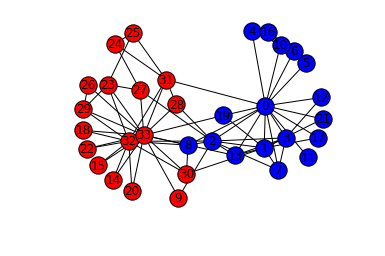

In [4]:
# I'm putting this in a function so we can call it later

def draw_zachary():
    nx.draw_networkx_nodes(G, pos, nodelist=team1, node_color="b")
    nx.draw_networkx_nodes(G, pos, nodelist=team2, node_color="r")
    nx.draw_networkx_edges(G, pos)
    nx.draw_networkx_labels(G, pos)
    plt.axis("off")
    plt.show()
    
draw_zachary()

We can see in this visualization that the split does appear to have occurred along friendship lines. Assume we didn't have this information, though. All we know is that 0 represents the owner of the karate club and 33 represents the main instructor.  What happens when we apply a community detection algorithm to this graph? Do the communities detected correspond to the way the karate club ultimately broke up?

Let's import the community detection library and use the method ``best_partition`` to apply the Louvain method and split the karate club into communities.

In [5]:
import community
partition = community.best_partition(G)

The output of the ``best_partition`` method is a dictionary. The keys are the nodes, and the values are integers representing which community the Louvain method assigned the node to.

In [6]:
partition

{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 1,
 5: 1,
 6: 1,
 7: 0,
 8: 2,
 9: 0,
 10: 1,
 11: 0,
 12: 0,
 13: 0,
 14: 2,
 15: 2,
 16: 1,
 17: 0,
 18: 2,
 19: 0,
 20: 2,
 21: 0,
 22: 2,
 23: 3,
 24: 3,
 25: 3,
 26: 2,
 27: 3,
 28: 3,
 29: 2,
 30: 2,
 31: 3,
 32: 2,
 33: 2}

Let's re-draw the network, this time coloring the nodes by their Louvain community assignments.

In [7]:
for node, assignment in partition.items():
    G.node[node]['assignment'] = assignment

In [8]:
communities = set(partition.values())

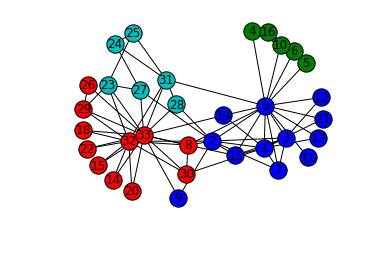

In [9]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
for i, com in enumerate(communities):
    member_nodes = [node for node in G.nodes() if G.node[node]['assignment'] == com]
    nx.draw_networkx_nodes(G, pos, nodelist=member_nodes, node_color=colors[i])
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)
plt.axis("off")
plt.show()

The Louvain method found 4 distinct communities in the Zachary club graph. On the left side, we have a dense, red cluster of individuals who are bound primarily to nodes 32 and 33, and a cyan cluster. On the right, we have blue cluster that is centered on node 0, as well an isolated green cluster that has links to node 0 but also links within the green cluster. 

Imagine that we were told that nodes 33 and 0 were splitting the school, and all other nodes had to choose to side with one of them. Based on our community assignments, what kind of predictions would we make on how this split would occur?

Well, the cyan and red groups are more tightly linked to node 33, so we could predict that these communities would side with 33. Similarly, the green and blue groups are more tightly linked to node 0, so we could predict taht these communities would side with node 0. For reference, here's how the club eventually *did* split.

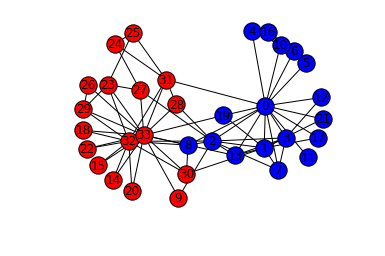

In [10]:
draw_zachary()

Note that are predictions, based on the communities found by the Louvain method, would have been quite accurate. The sole exceptions are node 9, which we predicted would side with 0, but sided 33, and node 8, which we predicted would side with 0, but sided with 33.  